## Child Phase 5 (Evaluation): Random Forest

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 16](https://data-science.training/kapitel-16/)
* Datum: 23.03.2023

Versionen 3, 4, 5, 6

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# Pickle Paket (Package) importieren
#  Objekte serialisieren
#  https://docs.python.org/3/library/pickle.html
import pickle as pk
# Eigene Module importieren
#  zur Bewertung der Modelle
import sys
sys.path.append('../00_DST_Module/')
import dst_score_functions as sf

In [5]:
# Datenversion festlegen: 3, 4, 5, 6
version  = 6
# Modell-Abkürzung festlegen: rf = Random Forest
shortcut = 'rf'

In [6]:
# Testdaten als Pandas Data Frame (df) aus Excel-Datei laden
#  (KNIME: "Excel Reader")
filename = '../../data/titanic/age/test_v' + str(version) + '.xlsx'
df_test  = pd.read_excel(filename)

In [7]:
# Modell laden
#  (KNIME: "PMML Reader")
filename = '../../models/titanic/age/' + shortcut + '_v' + str(version)
model = pk.load(open(filename, 'rb'))

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SibSp             210 non-null    int64  
 1   Parch             210 non-null    int64  
 2   Fare              210 non-null    float64
 3   TicketCount       210 non-null    int64  
 4   LogFare           210 non-null    float64
 5   FirstnameMeanAge  210 non-null    float64
 6   Pclass_2          210 non-null    int64  
 7   Pclass_3          210 non-null    int64  
 8   Sex_male          210 non-null    int64  
 9   Embarked_Q        210 non-null    int64  
 10  Embarked_S        210 non-null    int64  
 11  Title_Master      210 non-null    int64  
 12  Title_Miss        210 non-null    int64  
 13  Title_Mrs         210 non-null    int64  
 14  Title_Rare        210 non-null    int64  
 15  Child             210 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 26.4 

In [9]:
# Testdaten: Daten ohne Child extrahieren
X_test = df_test.iloc[:,0:15].values
#  Lösung (Child)
y_sol  = df_test.iloc[:,15].values

In [10]:
# Ergebnisse berechnen und ausgeben
#  (KNIME: "XYZ Predictor", "Scorer")
scores = sf.dst_scores_trained_model(model, X_test, y_sol)
sf.dst_print_scores(scores)


Confusion Matrix

* TN (True  Negatives) : 190
* TP (True  Positives) : 14
* FN (False Negatives) : 3
* FP (False Positives) : 3

Gütemaße

* Genauigkeit  (Accuracy)    :   97,14 %
* Spezifität   (Specificity) :   98,45 %
* Sensitivität (Sensitivity) :   82,35 %
* Präzision    (Precision)   :   82,35 %
* Recall       (Recall)      :   82,35 %
* F-Maß        (F Score)     :   82,35 %
* AURC         (AURC)        :   98,23 %
* LogLoss      (LogLoss)     :    0,088

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  90,02 %


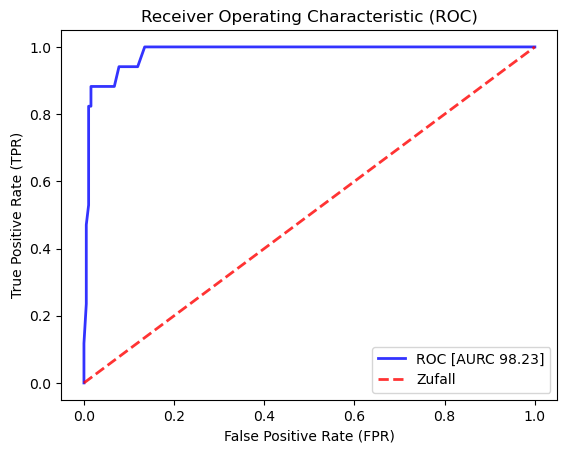

In [11]:
# Receiver Operating Characteristic (ROC) zeichnen
#  (KNIME: "ROC Curve")
sf.dst_roc_trained_model(model, X_test, y_sol)

## Ergebnisse

#### Version 3: Ungleiche Verteilung

Confusion Matrix

* TN (True  Negatives) : 190
* TP (True  Positives) : 15
* FN (False Negatives) : 2
* FP (False Positives) : 3

Gütemaße

* Genauigkeit  (Accuracy)    :   97,62 %
* Spezifität   (Specificity) :   98,45 %
* Sensitivität (Sensitivity) :   88,24 %
* Präzision    (Precision)   :   83,33 %
* Recall       (Recall)      :   88,24 %
* F-Maß        (F Score)     :   85,71 %
* AURC         (AURC)        :   98,02 %
* LogLoss      (LogLoss)     :    0,084

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  91,17 %

#### Version 4: Equal Size Sampling

Confusion Matrix

* TN (True  Negatives) : 179
* TP (True  Positives) : 16
* FN (False Negatives) : 1
* FP (False Positives) : 14

Gütemaße

* Genauigkeit  (Accuracy)    :   92,86 %
* Spezifität   (Specificity) :   92,75 %
* Sensitivität (Sensitivity) :   94,12 %
* Präzision    (Precision)   :   53,33 %
* Recall       (Recall)      :   94,12 %
* F-Maß        (F Score)     :   68,09 %
* AURC         (AURC)        :   97,55 %
* LogLoss      (LogLoss)     :    0,179

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  77,96 %

#### Version 5: Bootstrap

Confusion Matrix

* TN (True  Negatives) : 190
* TP (True  Positives) : 14
* FN (False Negatives) : 3
* FP (False Positives) : 3

Gütemaße

* Genauigkeit  (Accuracy)    :   97,14 %
* Spezifität   (Specificity) :   98,45 %
* Sensitivität (Sensitivity) :   82,35 %
* Präzision    (Precision)   :   82,35 %
* Recall       (Recall)      :   82,35 %
* F-Maß        (F Score)     :   82,35 %
* AURC         (AURC)        :   98,31 %
* LogLoss      (LogLoss)     :    0,087

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  90,04 %

#### Version 6: SMOTE

Confusion Matrix

* TN (True  Negatives) : 190
* TP (True  Positives) : 14
* FN (False Negatives) : 3
* FP (False Positives) : 3

Gütemaße

* Genauigkeit  (Accuracy)    :   97,14 %
* Spezifität   (Specificity) :   98,45 %
* Sensitivität (Sensitivity) :   82,35 %
* Präzision    (Precision)   :   82,35 %
* Recall       (Recall)      :   82,35 %
* F-Maß        (F Score)     :   82,35 %
* AURC         (AURC)        :   98,23 %
* LogLoss      (LogLoss)     :    0,088

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  90,02 %
